![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

from kmodes.kprototypes import KPrototypes
from scipy import stats
from scipy.stats import shapiro, boxcox

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE

In [3]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [4]:
penguins_df.groupby('sex').agg({
    'culmen_length_mm'   : ['mean', 'std'],
    'culmen_depth_mm'    : ['mean', 'std'],
    'flipper_length_mm'  : ['mean', 'std'],
    'body_mass_g'        : ['mean', 'std'],
})

culmen_length_mm           culmen_depth_mm           flipper_length_mm  \
                   mean       std            mean       std              mean   
sex                                                                             
FEMALE        42.096970  4.903476       16.425455  1.795681        197.363636   
MALE          45.922156  5.311257       17.871856  1.852185        204.544910   

                   body_mass_g              
              std         mean         std  
sex                                         
FEMALE  12.500776  3862.272727  666.172050  
MALE    14.582836  4546.556886  789.916288

In [5]:
num_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

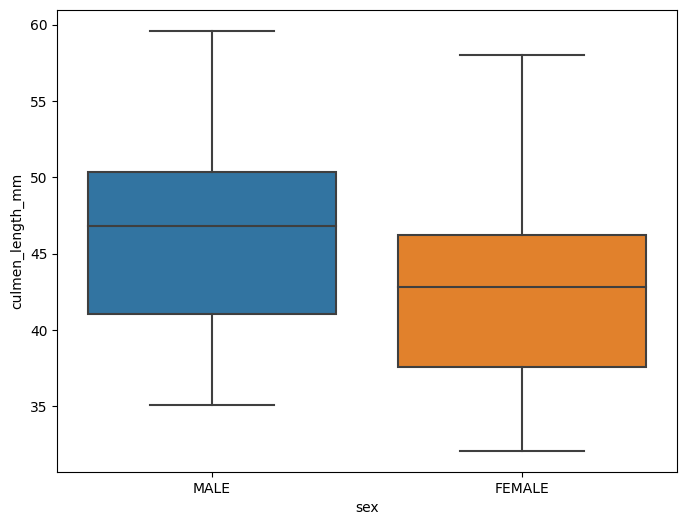

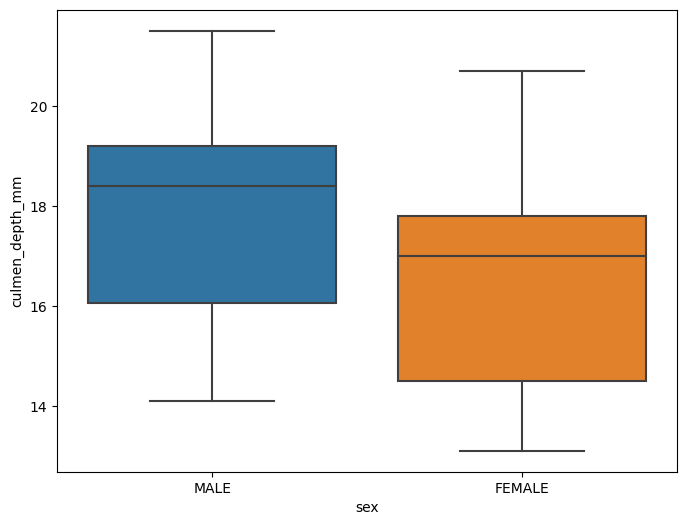

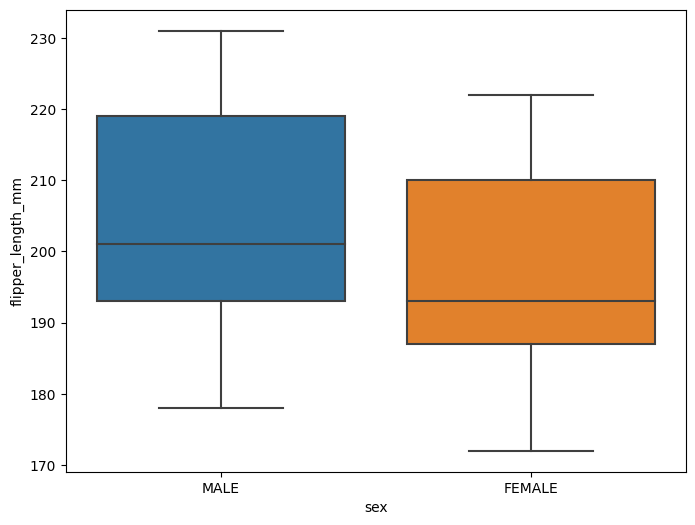

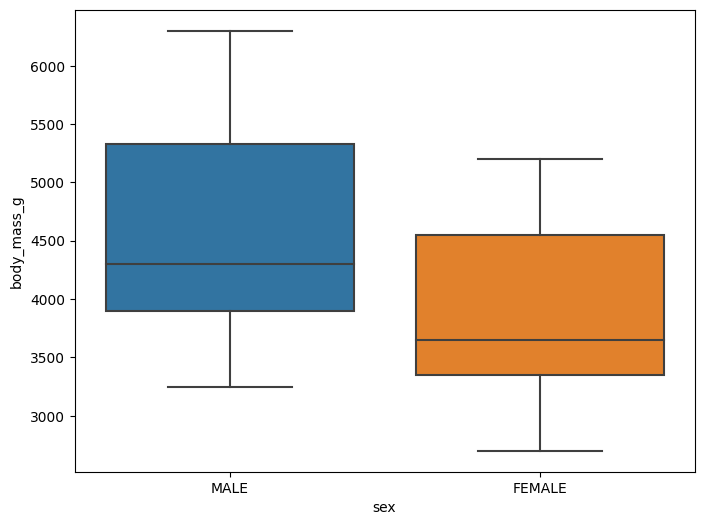

In [6]:
for feature in num_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=penguins_df, x='sex', y=feature)

C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

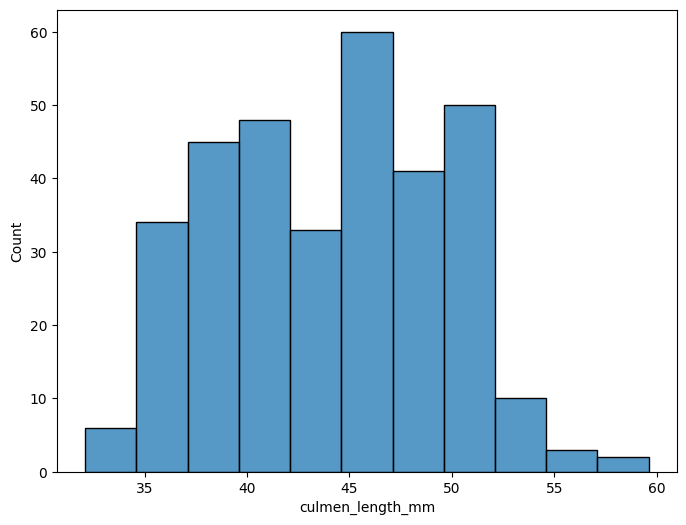

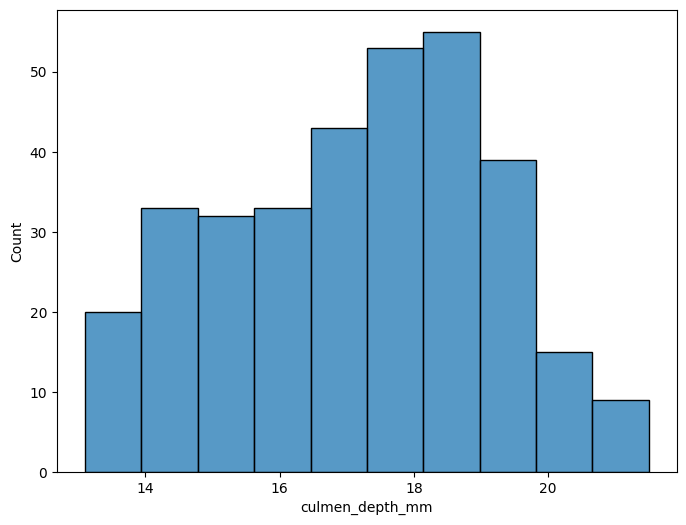

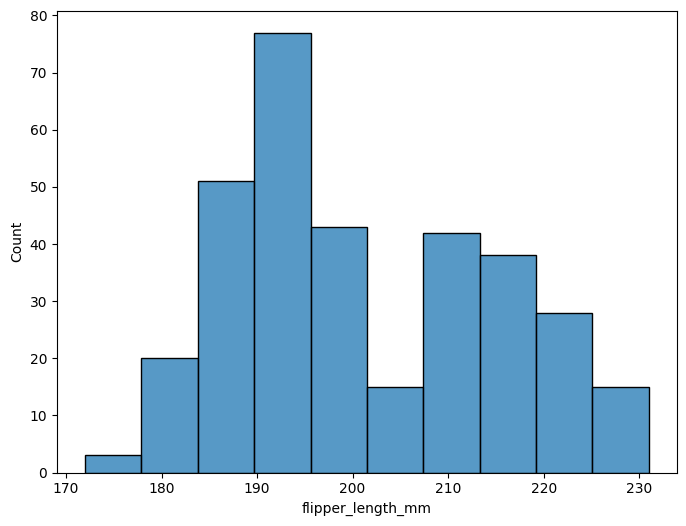

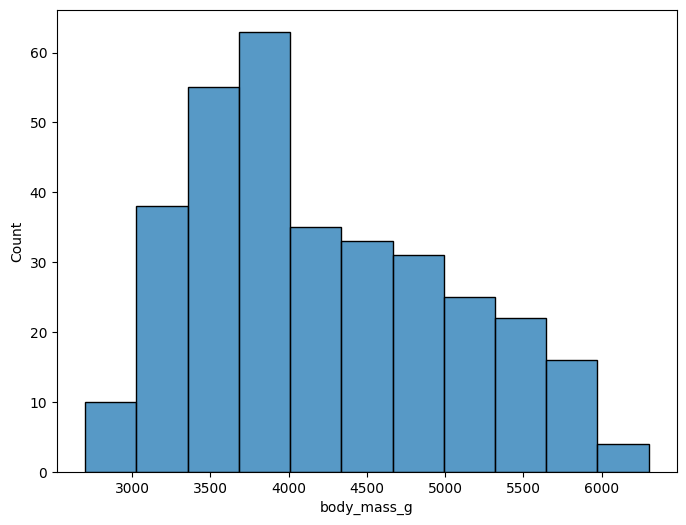

In [7]:
for feature in num_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=penguins_df, x=feature)

In [8]:
# normality check

# Apply Shapiro-Wilk test to each numeric feature
for feature in num_features:
    stat, p = shapiro(penguins_df[feature])
    print(f'Shapiro-Wilk Test for {feature}: Statistics={stat}, p-value={p}')
    if p <= 0.05:
        print('data NOT normally distributed')
    else:
        print('data YES normally distributed')

Shapiro-Wilk Test for culmen_length_mm: Statistics=0.9744664430618286, p-value=1.2913513273815624e-05
data NOT normally distributed
Shapiro-Wilk Test for culmen_depth_mm: Statistics=0.972769021987915, p-value=6.525147000502329e-06
data NOT normally distributed
Shapiro-Wilk Test for flipper_length_mm: Statistics=0.9514315724372864, p-value=5.200003538874398e-09
data NOT normally distributed
Shapiro-Wilk Test for body_mass_g: Statistics=0.957457423210144, p-value=3.122928404764025e-08
data NOT normally distributed


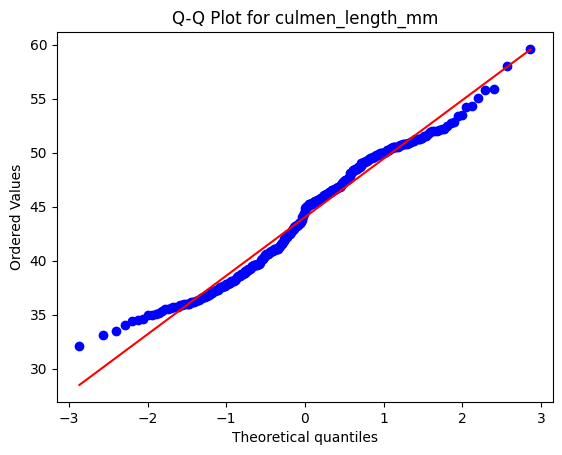

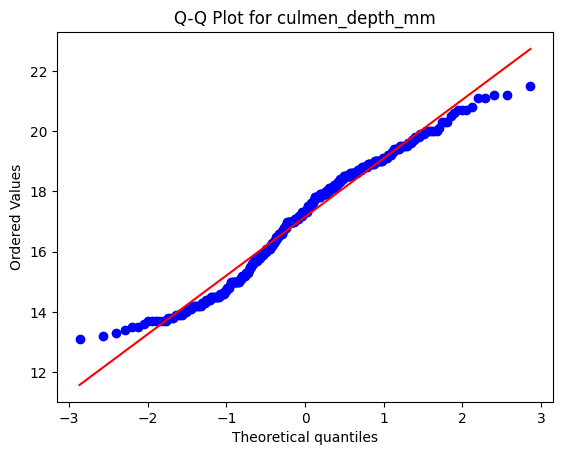

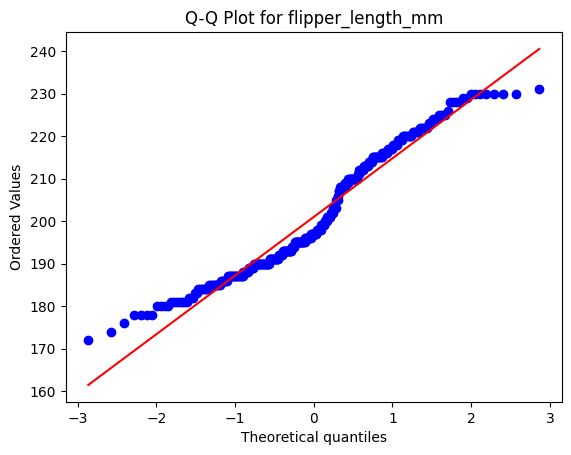

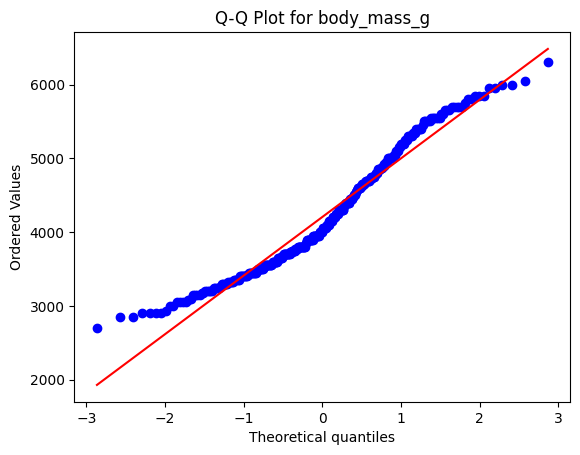

In [9]:
# Q-Q plot
for feature in num_features:
    stats.probplot(penguins_df[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {feature}')
    plt.show()

In [10]:
# # Apply Box-Cox transformation to each numeric feature, 

# for feature in num_features:
#     # Ensure all values are positive by adding a small constant if necessary
#     penguins_df[feature] = penguins_df[feature] + 1e-6
#     penguins_df[feature], _ = boxcox(penguins_df[feature])

In [11]:
# for feature in num_features:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(data=penguins_df, x=feature)

In [12]:
# # normality check

# # Apply Shapiro-Wilk test to each numeric feature
# for feature in num_features:
#     stat, p = shapiro(penguins_df[feature])
#     print(f'Shapiro-Wilk Test for {feature}: Statistics={stat}, p-value={p}')
#     if p <= 0.05:
#         print('data NOT normally distributed')
#     else:
#         print('data YES normally distributed')

In [13]:
# # Q-Q plot
# for feature in num_features:
#     stats.probplot(penguins_df[feature], dist="norm", plot=plt)
#     plt.title(f'Q-Q Plot for {feature}')
#     plt.show()

In [14]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [15]:
# as the data is not too far from a normal distribution, standardization might be more appropriate as it centers the data and adjusts for variance.

scaler = StandardScaler()
stand_num_features = scaler.fit_transform(penguins_df[num_features])
penguins_df[num_features] = stand_num_features

penguins_df

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0           -0.903906         0.790360          -1.425342    -0.566948    MALE
1           -0.830434         0.126187          -1.068577    -0.504847  FEMALE
2           -0.683490         0.432728          -0.426399    -1.187953  FEMALE
3           -1.344738         1.096901          -0.569105    -0.939551  FEMALE
4           -0.867170         1.761074          -0.783164    -0.691149    MALE
..                ...              ...                ...          ...     ...
327          0.583904        -1.764152           0.929309     0.892415  FEMALE
328          0.510432        -1.457611           1.000662     0.799264  FEMALE
329          1.171681        -0.742347           1.500134     1.917074    MALE
330          0.216543        -1.202160           0.786603     1.233968  FEMALE
331          1.079841        -0.537986           0.857956     1.482370    MALE

[332 rows x 5 columns]

In [16]:
# Convert categorical feature to numerical codes
penguins_df['sex'] = penguins_df['sex'].astype('category').cat.codes

penguins_df

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
0           -0.903906         0.790360          -1.425342    -0.566948    1
1           -0.830434         0.126187          -1.068577    -0.504847    0
2           -0.683490         0.432728          -0.426399    -1.187953    0
3           -1.344738         1.096901          -0.569105    -0.939551    0
4           -0.867170         1.761074          -0.783164    -0.691149    1
..                ...              ...                ...          ...  ...
327          0.583904        -1.764152           0.929309     0.892415    0
328          0.510432        -1.457611           1.000662     0.799264    0
329          1.171681        -0.742347           1.500134     1.917074    1
330          0.216543        -1.202160           0.786603     1.233968    0
331          1.079841        -0.537986           0.857956     1.482370    1

[332 rows x 5 columns]

In [17]:
# Convert DataFrame to numpy array
penguins_array = penguins_df.to_numpy()
penguins_array

array([[-0.90390586,  0.79035987, -1.42534179, -0.56694801,  1.        ],
       [-0.83043377,  0.12618674, -1.0685765 , -0.50484747,  0.        ],
       [-0.68348959,  0.43272819, -0.42639899, -1.18795343,  0.        ],
       ...,
       [ 1.17168063, -0.74234736,  1.50013355,  1.91707363,  1.        ],
       [ 0.21654349, -1.20215952,  0.78660298,  1.23396768,  0.        ],
       [ 1.07984052, -0.53798639,  0.85795603,  1.48236985,  1.        ]])

In [18]:
# ELBOW Method

cost = [] # “cost” in K-Prototypes is analogous to “inertia” in K-Means
silhouette = []

for k in range(1, 11):
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0)
    kproto.fit(penguins_array, categorical=[4]) # categorical=[4] indicates that the 5th column (index 4) is a categorical feature (in this case, the sex attribute).
    cost.append(kproto.cost_)
    print(f"The inertia (cost) with {k} clusters is: {kproto.cost_}")
    if k > 1:
        cluster_labels = kproto.predict(penguins_array, categorical=[4]) 
        # Calculate the Silhouette Score
        silhouette_avg = silhouette_score(penguins_array, cluster_labels)
        print(f"The average silhouette score with {k} clusters is: {silhouette_avg}\n")
        silhouette.append(silhouette_avg)

The inertia (cost) with 1 clusters is: 1410.4999999999995
The inertia (cost) with 2 clusters is: 631.8988496689589
The average silhouette score with 2 clusters is: 0.5020178515380439

The inertia (cost) with 3 clusters is: 433.1849946409283
The average silhouette score with 3 clusters is: 0.40911008114902186

The inertia (cost) with 4 clusters is: 329.8389759442946
The average silhouette score with 4 clusters is: 0.3980979361886114

The inertia (cost) with 5 clusters is: 249.3299212106523
The average silhouette score with 5 clusters is: 0.414442589975327

The inertia (cost) with 6 clusters is: 209.80343569722902
The average silhouette score with 6 clusters is: 0.4210397754853113

The inertia (cost) with 7 clusters is: 193.55374291605796
The average silhouette score with 7 clusters is: 0.38153344572601017

The inertia (cost) with 8 clusters is: 181.24492902731814
The average silhouette score with 8 clusters is: 0.3181545228726209

The inertia (cost) with 9 clusters is: 171.6798570402478

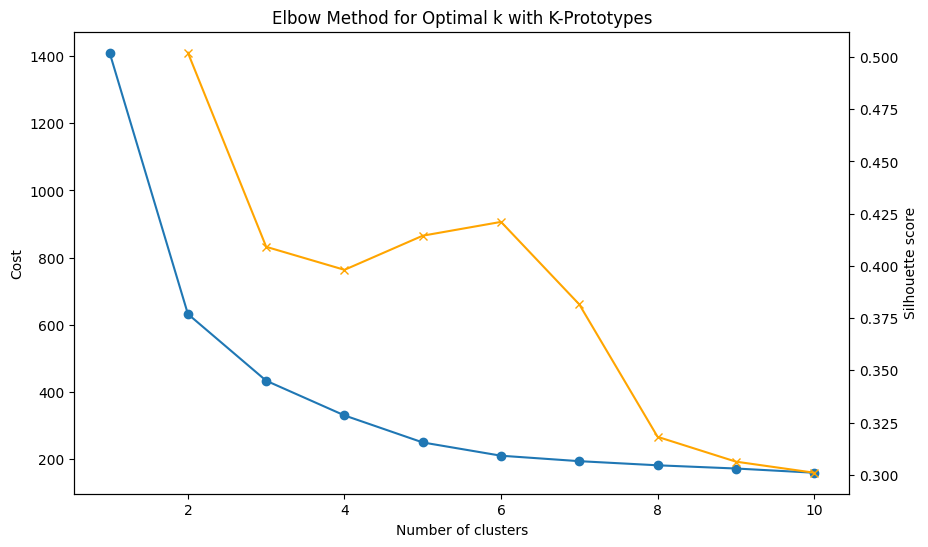

In [19]:
# Plot the cost values
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(range(1, 11), cost, marker='o')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Cost')
ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette score')
plt.plot(range(2, 11), silhouette, marker='x', c='orange')
plt.title('Elbow Method for Optimal k with K-Prototypes')
plt.show()

In [20]:

# Apply K-Prototypes
kproto = KPrototypes(n_clusters=5, init='Cao', verbose=1)
cluster_labels_KM = kproto.fit_predict(penguins_array, categorical=[4]) 
# Add cluster labels to the DataFrame
penguins_df['cluster_KM'] = cluster_labels_KM
penguins_df

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 108, ncost: 257.01809108704003
Run: 1, iteration: 2/100, moves: 23, ncost: 249.8461182147483
Run: 1, iteration: 3/100, moves: 6, ncost: 249.32992121065232
Run: 1, iteration: 4/100, moves: 0, ncost: 249.32992121065232
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 71, ncost: 274.1782103803806
Run: 2, iteration: 2/100, moves: 45, ncost: 251.51681803912953
Run: 2, iteration: 3/100, moves: 13, ncost: 249.4879288495554
Run: 2, iteration: 4/100, moves: 2, ncost: 249.34491095183523
Run: 2, iteration: 5/100, moves: 0, ncost: 249.34491095183523
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 64, ncost: 404.17781894840255
Run: 3, iteration: 2/100, moves: 45, ncost: 336.501019394944

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex  \
0           -0.903906         0.790360          -1.425342    -0.566948    1   
1           -0.830434         0.126187          -1.068577    -0.504847    0   
2           -0.683490         0.432728          -0.426399    -1.187953    0   
3           -1.344738         1.096901          -0.569105    -0.939551    0   
4           -0.867170         1.761074          -0.783164    -0.691149    1   
..                ...              ...                ...          ...  ...   
327          0.583904        -1.764152           0.929309     0.892415    0   
328          0.510432        -1.457611           1.000662     0.799264    0   
329          1.171681        -0.742347           1.500134     1.917074    1   
330          0.216543        -1.202160           0.786603     1.233968    0   
331          1.079841        -0.537986           0.857956     1.482370    1   

     cluster_KM  
0             4  
1             1  
2             1  
3             1  
4             4  
..          ...  
327           2  
328           2  
329           3  
330           2  
331           3  

[332 rows x 6 columns]

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

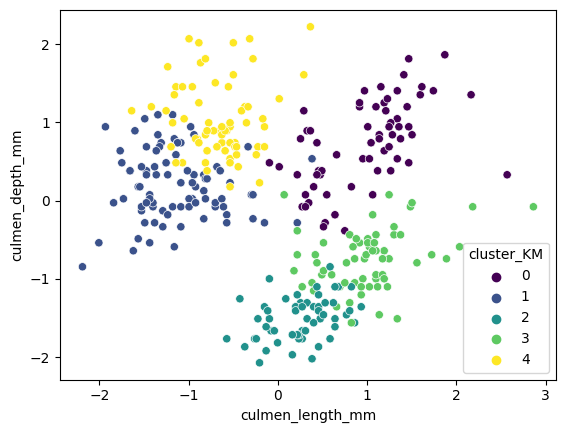

In [21]:
sns.scatterplot(data=penguins_df, x='culmen_length_mm', y='culmen_depth_mm',hue='cluster_KM',palette="viridis")

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

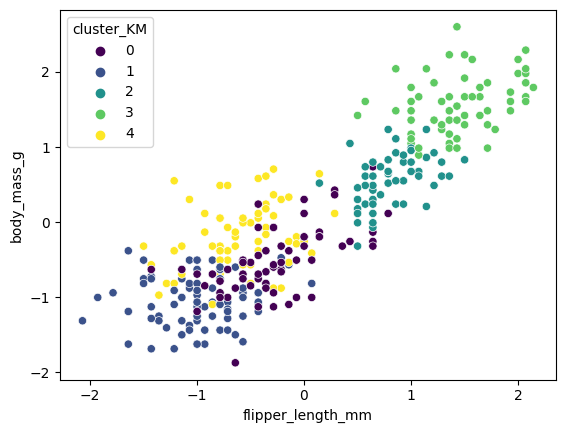

In [22]:
sns.scatterplot(data=penguins_df, x='flipper_length_mm', y='body_mass_g',hue='cluster_KM',palette="viridis")

<Axes: xlabel='sex', ylabel='body_mass_g'>

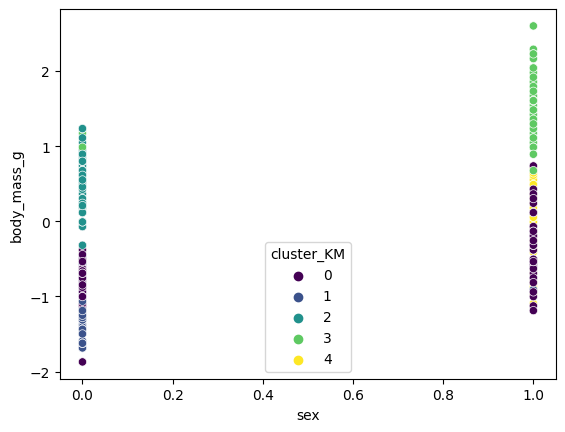

In [23]:
sns.scatterplot(data=penguins_df, x='sex', y='body_mass_g',hue='cluster_KM',palette="viridis")

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

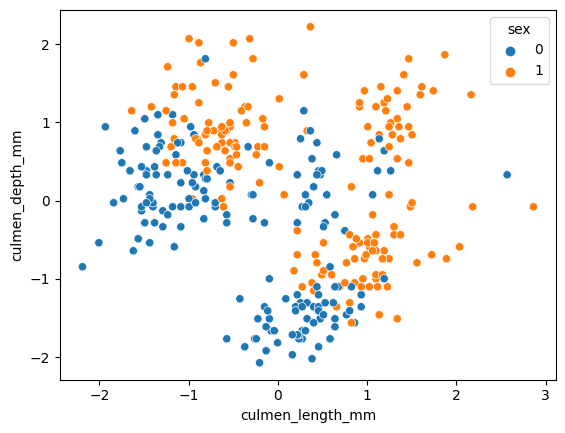

In [24]:
sns.scatterplot(data=penguins_df, x='culmen_length_mm', y='culmen_depth_mm',hue='sex')

In [25]:
# DBSCAN

minPoints = 7 # The value of minPoints is often set to twice the number of dimensions of the dataset (2*penguins_array.shape[1])

# Compute the k-distance (k = minPoints - 1)
neighbors = NearestNeighbors(n_neighbors=minPoints)
neighbors_fit = neighbors.fit(penguins_array)
distances, indices = neighbors_fit.kneighbors(penguins_array)

# Set print options to display all columns but limit rows
np.set_printoptions(threshold=0, edgeitems=4, linewidth=np.inf)

print(distances.shape, indices.shape)
print(distances)
print(indices)

(332, 7) (332, 7)
[[0.         0.31180672 0.32546407 0.36070992 0.37863314 0.40073724 0.44752985]
 [0.         0.32780596 0.40331437 0.47794618 0.47995209 0.54643047 0.55027479]
 [0.         0.24466152 0.4473244  0.49787674 0.51656359 0.53419247 0.57228479]
 [0.         0.41382058 0.42286007 0.46321332 0.54279861 0.55594866 0.57988015]
 ...
 [0.         0.17282414 0.29463399 0.32490315 0.33635419 0.35875622 0.3622723 ]
 [0.         0.26922457 0.30783488 0.32385563 0.35189782 0.35948605 0.39493048]
 [0.         0.36242829 0.42930106 0.43106735 0.47799002 0.51351357 0.58215378]
 [0.         0.32841703 0.47062159 0.57950322 0.60001433 0.65252963 0.66913678]]
[[  0 138  15  98  23  20  27]
 [  1  49  43   5  55 127  69]
 [  2 105 119 123 133  26  65]
 [  3 125  10  80  16  82  89]
 ...
 [328 266 299 293 327 303 262]
 [329 256 253 304 271 241 216]
 [330 234 284 244 305 219 303]
 [331 224 251 247 315 307 228]]


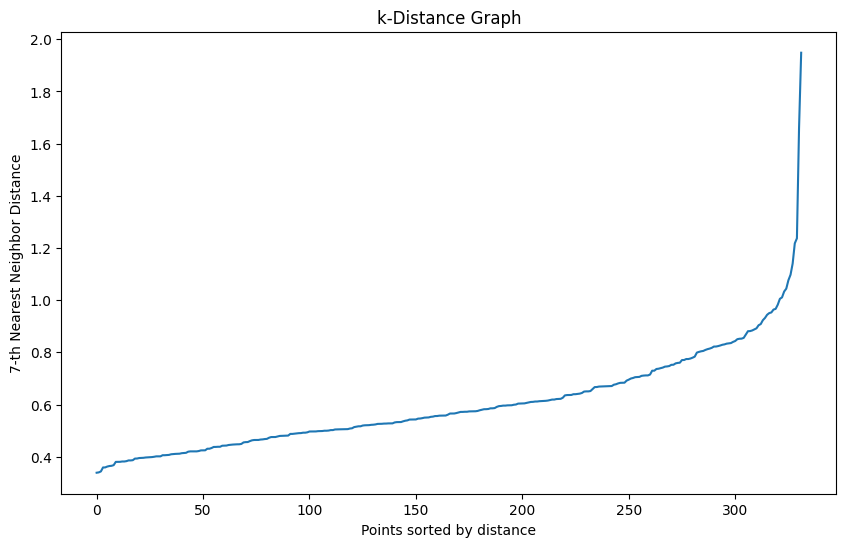

In [26]:
# Sort the distances of all the kth (minPonnts - 1) neighbours
distances = np.sort(distances[:, minPoints - 1])

# Plot the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{minPoints}-th Nearest Neighbor Distance')
plt.show()

In [27]:
epsilon = 0.8  # set at the point where the above distance curve forms a elbow

# Apply DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=minPoints)
cluster_labels_DBS = dbscan.fit_predict(penguins_array)
penguins_df['cluster_DBS'] = cluster_labels_DBS + 1 # otherwise the clusters starts from -1
print('number of DBSCAN clusters =', penguins_df['cluster_DBS'].nunique())
penguins_df

number of DBSCAN clusters = 6


culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex  \
0           -0.903906         0.790360          -1.425342    -0.566948    1   
1           -0.830434         0.126187          -1.068577    -0.504847    0   
2           -0.683490         0.432728          -0.426399    -1.187953    0   
3           -1.344738         1.096901          -0.569105    -0.939551    0   
4           -0.867170         1.761074          -0.783164    -0.691149    1   
..                ...              ...                ...          ...  ...   
327          0.583904        -1.764152           0.929309     0.892415    0   
328          0.510432        -1.457611           1.000662     0.799264    0   
329          1.171681        -0.742347           1.500134     1.917074    1   
330          0.216543        -1.202160           0.786603     1.233968    0   
331          1.079841        -0.537986           0.857956     1.482370    1   

     cluster_KM  cluster_DBS  
0             4            1  
1             1            2  
2             1            2  
3             1            2  
4             4            1  
..          ...          ...  
327           2            4  
328           2            4  
329           3            5  
330           2            4  
331           3            5  

[332 rows x 7 columns]

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

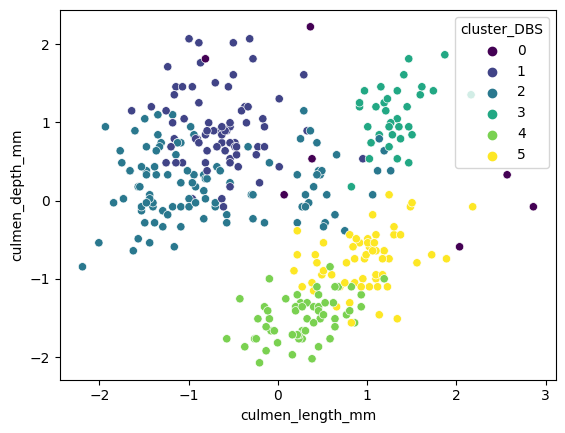

In [28]:
sns.scatterplot(data=penguins_df, x='culmen_length_mm', y='culmen_depth_mm',hue='cluster_DBS',palette="viridis")

In [29]:
all_features = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','sex']

# Calculate the correlation matrix
penguins_df[all_features].corr()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.220570           0.654967   
culmen_depth_mm           -0.220570         1.000000          -0.580062   
flipper_length_mm          0.654967        -0.580062           1.000000   
body_mass_g                0.593396        -0.476386           0.873267   
sex                        0.351299         0.369478           0.256198   

                   body_mass_g       sex  
culmen_length_mm      0.593396  0.351299  
culmen_depth_mm      -0.476386  0.369478  
flipper_length_mm     0.873267  0.256198  
body_mass_g           1.000000  0.424936  
sex                   0.424936  1.000000

In [30]:
# continuous_features = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
# df_continuous_features = penguins_df[continuous_features]

df_all_features = penguins_df[all_features]

X = add_constant(df_all_features)  # Add a constant term for the intercept to check multicollinearity with Variance Inflation Factor (VIF)
X

const  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0      1.0         -0.903906         0.790360          -1.425342    -0.566948   
1      1.0         -0.830434         0.126187          -1.068577    -0.504847   
2      1.0         -0.683490         0.432728          -0.426399    -1.187953   
3      1.0         -1.344738         1.096901          -0.569105    -0.939551   
4      1.0         -0.867170         1.761074          -0.783164    -0.691149   
..     ...               ...              ...                ...          ...   
327    1.0          0.583904        -1.764152           0.929309     0.892415   
328    1.0          0.510432        -1.457611           1.000662     0.799264   
329    1.0          1.171681        -0.742347           1.500134     1.917074   
330    1.0          0.216543        -1.202160           0.786603     1.233968   
331    1.0          1.079841        -0.537986           0.857956     1.482370   

     sex  
0      1  
1      0  
2      0  
3      0  
4      1  
..   ...  
327    0  
328    0  
329    1  
330    0  
331    1  

[332 rows x 6 columns]

In [31]:
vif = pd.DataFrame()
vif['Variable'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

            Variable       VIF
0              const  3.583821
1   culmen_length_mm  1.901198
2    culmen_depth_mm  2.963661
3  flipper_length_mm  5.969264
4        body_mass_g  5.668765
5                sex  2.552877


C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

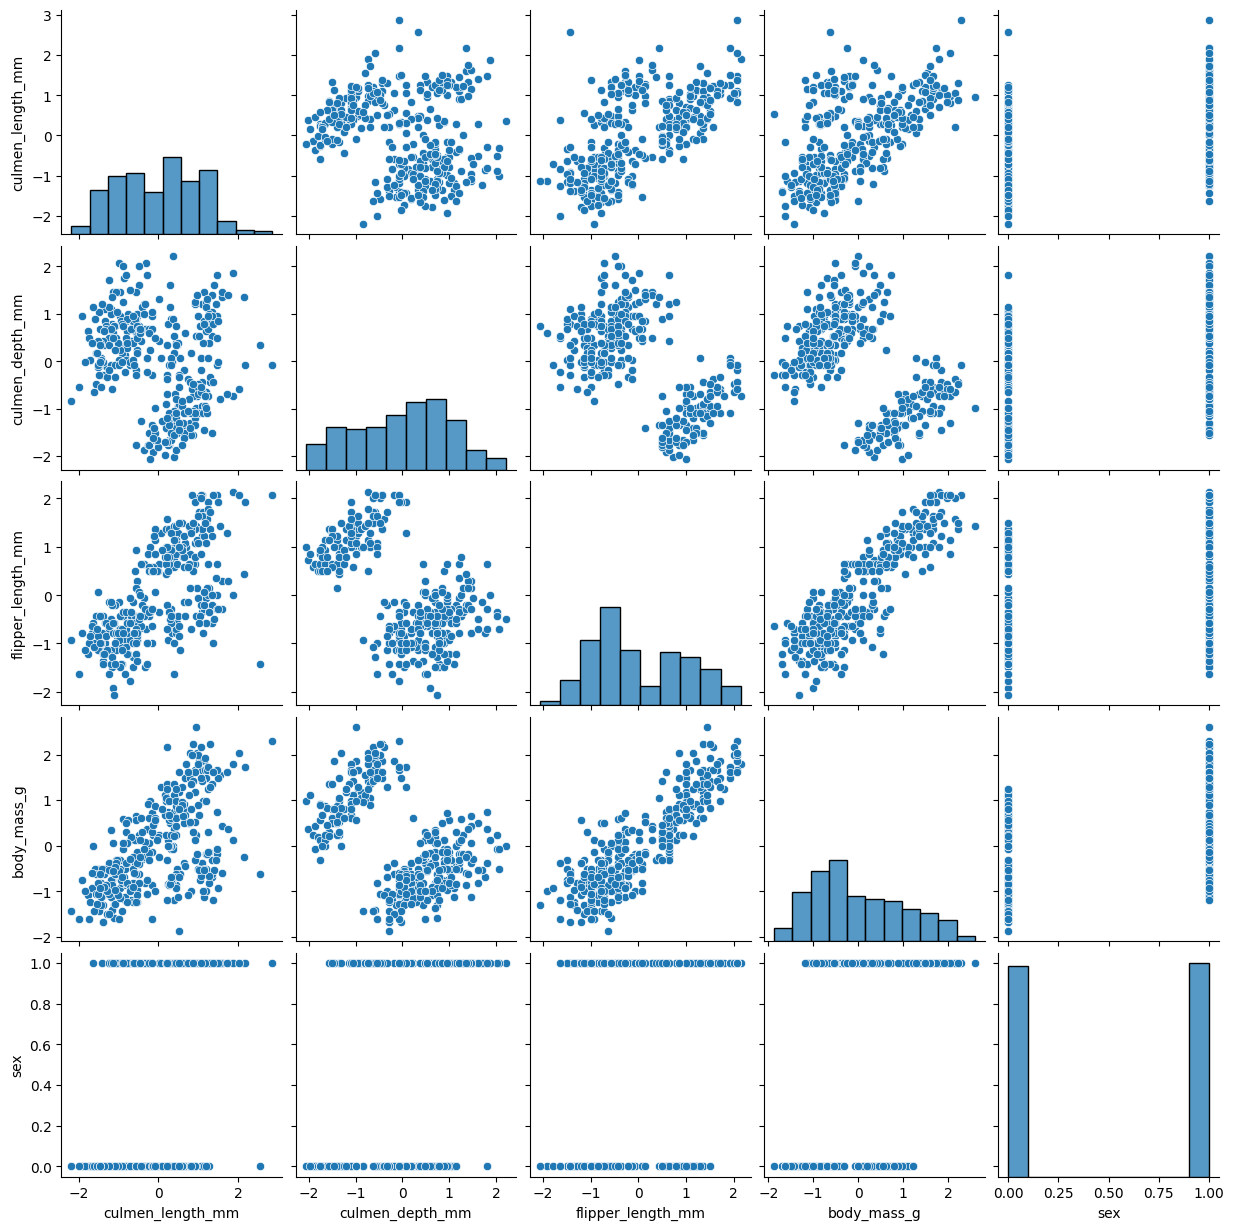

In [32]:
# checking linearity

sns.pairplot(df_all_features)


In [33]:
# given the features linearity, we apply PCA for dimensionality reduction

max_components = len(all_features)
total_explained_variance = []

for n_components in range(1, max_components + 1):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(penguins_df[all_features])
    explained_variance_ratio = pca.explained_variance_ratio_
    total_explained_variance.append(np.sum(explained_variance_ratio))
    
total_explained_variance

[0.6504039577001045,
 0.8617616054739554,
 0.9561783759510439,
 0.9832667078678252,
 1.0000000000000002]

Text(0, 0.5, 'Total Variance Percentage explained')

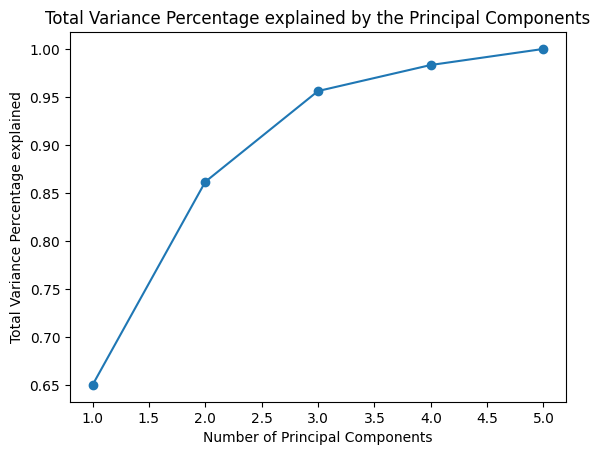

In [34]:
plt.plot(range(1, max_components + 1), total_explained_variance, marker='o')
plt.title('Total Variance Percentage explained by the Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Total Variance Percentage explained')

In [35]:
# let's use 3 PCs, which explain more than 95% of the total variance percentage

pca = PCA(n_components = 3)
principal_components = pca.fit_transform(penguins_df[all_features])
df_penguins_PCA = pd.DataFrame(principal_components, columns = ['PC1', 'PC2', 'PC3'])
df_penguins_PCA['cluster_KM'] = cluster_labels_KM
df_penguins_PCA['cluster_DBS'] = cluster_labels_DBS + 1
df_penguins_PCA

PC1       PC2       PC3  cluster_KM  cluster_DBS
0   -1.811809  0.325205 -0.443252           4            1
1   -1.361035 -0.538915 -0.015252           1            2
2   -1.420341 -0.302660  0.267996           1            2
3   -1.923688 -0.076666 -0.471091           1            2
4   -1.869736  1.083488 -0.685841           4            1
..        ...       ...       ...         ...          ...
327  1.936622 -1.205336  0.348788           2            4
328  1.774128 -1.011414  0.262114           2            4
329  2.782812  0.360270 -0.417381           3            5
330  1.658192 -0.908028 -0.201512           2            4
331  2.052197  0.435989 -0.185611           3            5

[332 rows x 5 columns]

<Axes: xlabel='PC1', ylabel='PC2'>

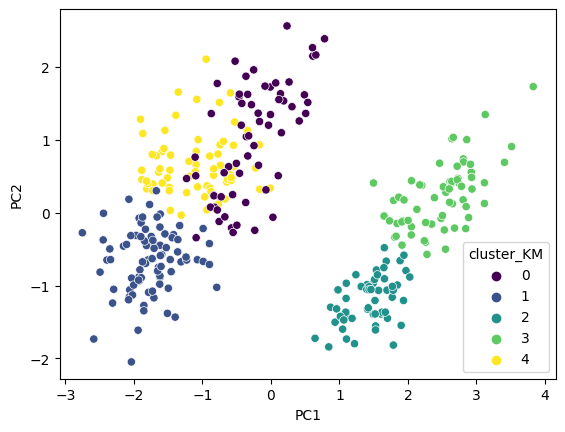

In [36]:
sns.scatterplot(data=df_penguins_PCA, x='PC1', y='PC2',hue='cluster_KM',palette="viridis")

<Axes: xlabel='PC1', ylabel='PC2'>

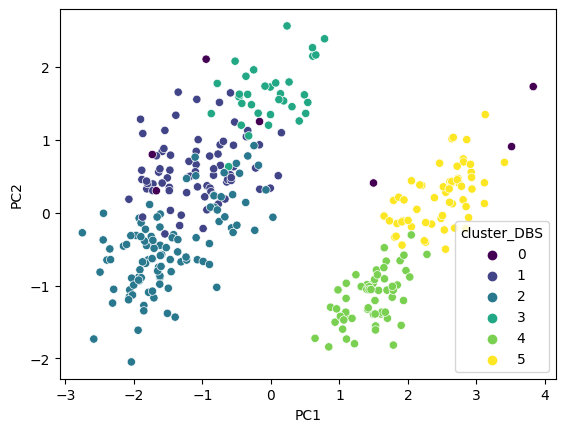

In [37]:
sns.scatterplot(data=df_penguins_PCA, x='PC1', y='PC2',hue='cluster_DBS',palette="viridis")

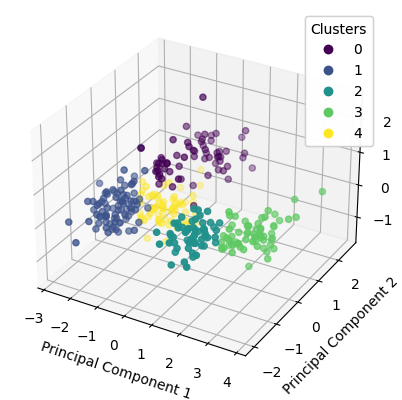

In [38]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df_penguins_PCA['PC1'], df_penguins_PCA['PC2'], df_penguins_PCA['PC3'], 
                     c=df_penguins_PCA['cluster_KM'], cmap='viridis')

# Add labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add a legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

In [39]:
# The output should be a DataFrame named stat_penguins with one row per cluster that shows the mean of the original variables (or columns in "penguins.csv") by cluster. stat_penguins should not include any non-numeric columns.

In [44]:
stat_penguins = penguins_df.groupby('cluster_KM')[['culmen_length_mm','culmen_depth_mm','flipper_length_mm']].mean().rename_axis('label')
stat_penguins

culmen_length_mm  culmen_depth_mm  flipper_length_mm
label                                                      
0              0.975172         0.726294          -0.267837
1             -1.136567         0.196740          -0.977686
2              0.255576        -1.503227           0.823554
3              1.003453        -0.744780           1.459360
4             -0.658999         1.042715          -0.591808